In [13]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/hjmesa/Dengue/master/init.py
from init import init; init(force_download=False)

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


#  Captura y normalizacion de los datos (si esta es requerida)

In [14]:
import numpy as np
from pandas import read_csv
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# -----------------------------------------------------------------------------
# CAPTURA DE DATOS
# -----------------------------------------------------------------------------    

# Cargar el archivo de datos historicos

#Datos desnormalizados listos para el proceso
#FILE1 = 'local/data/DATOS_MENSUALES/DATOS_MENSUALES_ESTACIONES_NINO.csv'

#Datos historicos normalizados, requieren denormalizacion para transformarlo en los datso 
FILE1 = 'local/data/DATOS_MENSUALES/DATOS_MENSUALES_NORMALIZADOS_CALI.csv'
FILE2 = 'local/data/DATOS_MENSUALES/PROMEDIOS_MENSUALES.CSV'
FILE3 = 'local/data/DATOS_MENSUALES/DESV_ESTA_MENSUALES.CSV'


#Carga del archivo de datos sin normalizar
#dataset = read_csv(FILE1, header=0, index_col=False)

#Carga de los archivos cuando estan normalizados
dataset = read_csv(FILE1, header=0, index_col=False)
media = read_csv(FILE2, header=0, index_col=False)
d_estd = read_csv(FILE3, header=0, index_col=False)

#my_column = dataset.pop("Confirmados")
#dataset.insert(14, my_column.name, my_column)

#Eliminar datos no requeridos
#dataset = dataset.drop(["Todos"], axis=1)

#Capturar los datos normalizados o desnormalizados en una matriz
Datos = dataset.values

#Captura de los parametros de desnormalizacion
v_media = media.values
v_d_estd = d_estd.values

#Creacion de la matriz desnormalizada
Datos_dn = np.zeros((len(Datos), len(Datos[0])))
for i in range (0,len(Datos)):
    Datos_dn[i,0]=Datos[i,0]
    Datos_dn[i,1]=Datos[i,1]
    for j in range (2, len(Datos[0])):
        Datos_dn[i,j]=Datos[i,j]*v_d_estd[int(Datos[i,1]-1),j-1]+v_media[int(Datos[i,1])-1,j-1]
        


Nombres = ['Año','Mes','Precipitación','Humedad relativa media','Humedad relativa máxima','Humedad relativa mínima',
           'Temperatura media','Temperatura máxima','Temperatura mínima','Temperatura Niño 1+2','Anomalia Niño 1+2',
           'Temperatura Niño 3','Anomalia Niño 3','Temperatura Niño 4','Anomalia  Niño 4','Temperatura Niño 3+4',
           'Anomalia Niño 3+4','Casos confirmados por laboratorio','Todos los casos']


#Número de datos
L=len(Datos)

# Regresion lineal simple con datos normalizados

=                                      REGRESION LINEL SIMPLE                                      =
=                                                                                                  =
=                                DATOS MENSUALES NORMALIZADOS - CALI                               =




****************************Precipitación*****************************




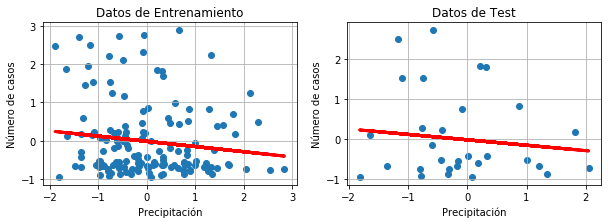

Precisión del modelo: R =  0.020068055543243646



************************Humedad relativa media************************




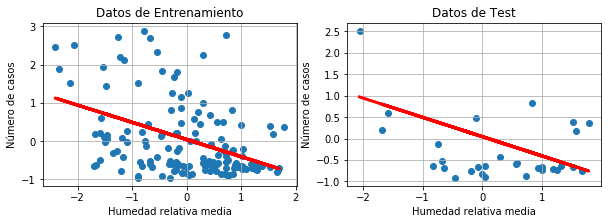

Precisión del modelo: R =  0.1732846309726109



***********************Humedad relativa máxima************************




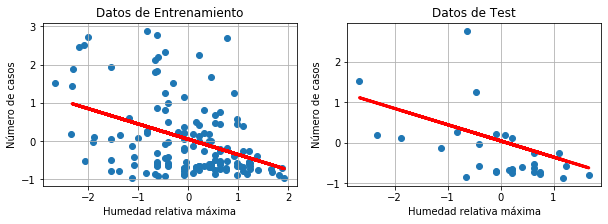

Precisión del modelo: R =  0.1472782360766658



***********************Humedad relativa mínima************************




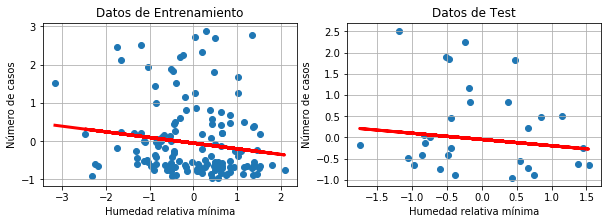

Precisión del modelo: R =  0.023737654153567878



**************************Temperatura media***************************




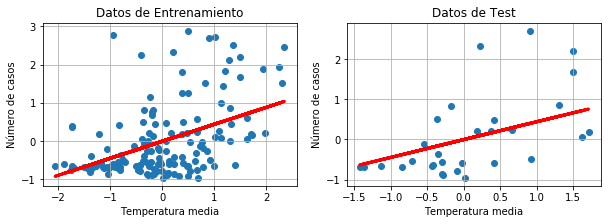

Precisión del modelo: R =  0.21191355284415714



**************************Temperatura máxima**************************




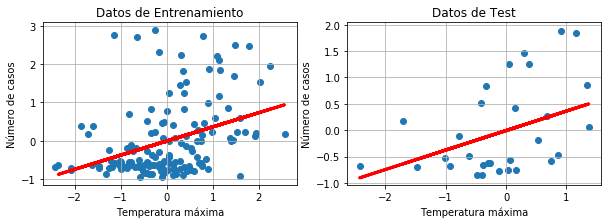

Precisión del modelo: R =  0.13466226328664443



**************************Temperatura mínima**************************




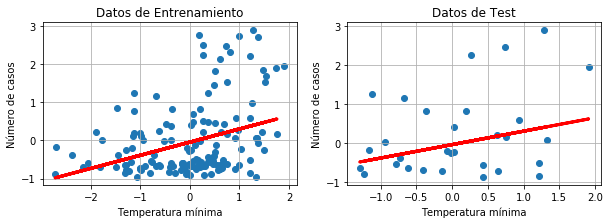

Precisión del modelo: R =  0.13277712456729562



*************************Temperatura niño 1+2*************************




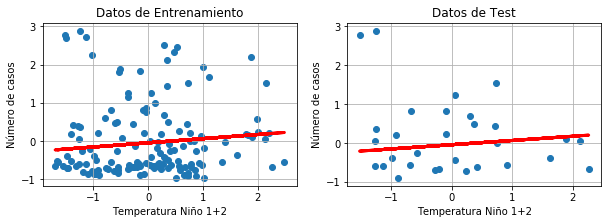

Precisión del modelo: R =  0.011275198365714443



**************************Anomalia niño 1+2***************************




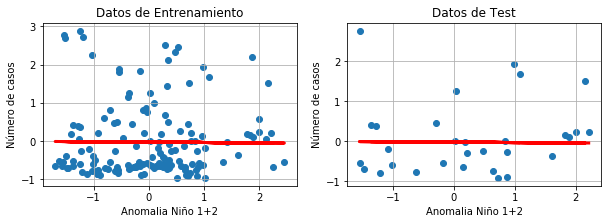

Precisión del modelo: R =  8.02745176931019e-05



**************************Temperatura niño 3**************************




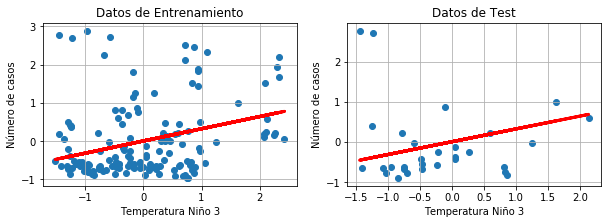

Precisión del modelo: R =  0.10105903220999002



***************************Anomalia niño 3****************************




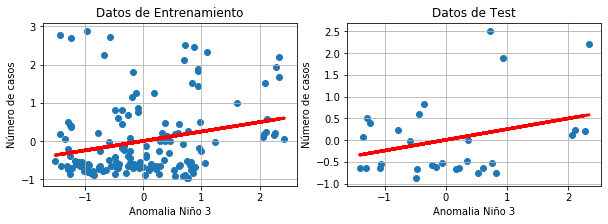

Precisión del modelo: R =  0.053549203401285994



**************************Temperatura niño 4**************************




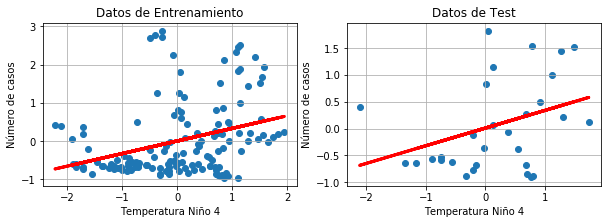

Precisión del modelo: R =  0.10471476936714597



***************************Anomalia  niño 4***************************




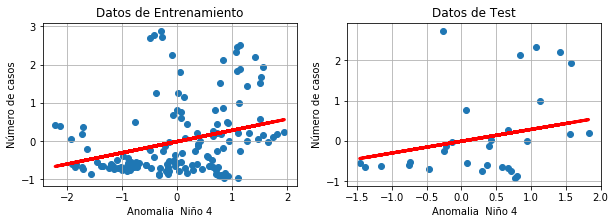

Precisión del modelo: R =  0.09405556893345



*************************Temperatura niño 3+4*************************




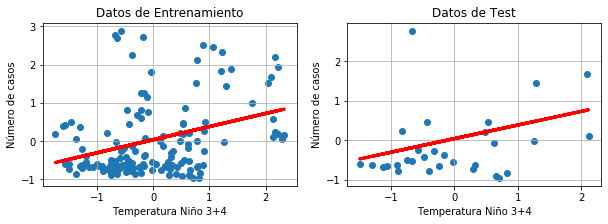

Precisión del modelo: R =  0.11354050544298144



**************************Anomalia niño 3+4***************************




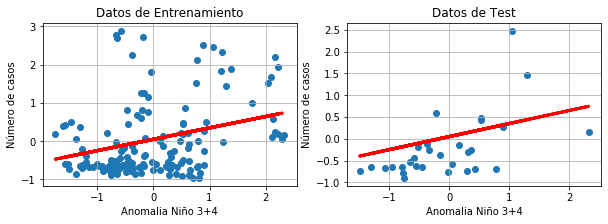

Precisión del modelo: R =  0.08681885560539293





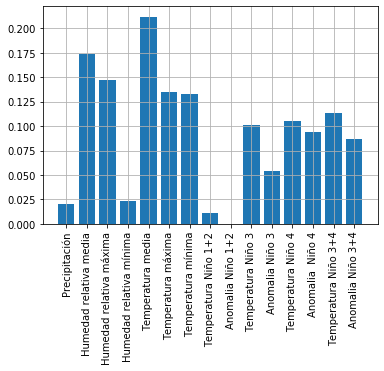

In [15]:
#Precision en la regresion lineal simple con datos normalizados

#Arreglo para almacenar la correlacion simple de cada variable normalizada
P_R_L_S_N = np.zeros(15)

#Encabezado
cadena = ""
print (cadena.center(100, "="))
cadena = "                                      REGRESION LINEL SIMPLE                                      "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                                DATOS MENSUALES NORMALIZADOS - CALI                               "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    


#Seleccionar como variable dependiente el numero de casos
y = Datos[:, len(Datos[0])-2]


for i in range (2,len(Datos[0])-2):
    cadena = Nombres[i].capitalize() 
    print (cadena.center(70, "*")) 
    print ('\n')    

    
    # Capturar y estructurar las variables independientes del modelo
    X = Datos[:, i]
    X = np.reshape(X, (L,1))
    


    #Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

    #Defino el algoritmo a utilizar
    lr = linear_model.LinearRegression()

    #Entreno el modelo
    lr.fit(X_train, y_train)

    #Realizo una predicción para datos de entrenamientos
    Y_pred = lr.predict(X_train)

    
    #Graficamos los datos correspondientes
    fig, axes = plt.subplots(1, 2, figsize=(10,3))
    
    # Grafico de datos de entrenamiento y prediccion con esos datos
    axes[0].scatter(X, y)
    axes[0].plot(X_train, Y_pred, color='red', linewidth=3)
    axes[0].grid(True)
    axes[0].set_title('Datos de Entrenamiento')
    axes[0].set_xlabel(Nombres[i])
    axes[0].set_ylabel('Número de casos')

    #Realizo una predicción para datos de test
    Y_pred = lr.predict(X_test)

    
    # Grafico de datos de test y prediccion con esos datos
    axes[1].scatter(X_test, y_test)
    axes[1].plot(X_test, Y_pred, color='red', linewidth=3)
    axes[1].grid(True)
    axes[1].set_title('Datos de Test')
    axes[1].set_xlabel(Nombres[i])
    axes[1].set_ylabel('Número de casos')
    plt.show()
    P_R_L_S_N[i-2]=lr.score(X_train, y_train)
    print('Precisión del modelo: R = ',P_R_L_S_N[i-2])
    print('\n\n')    

    
#Grafico de barras con la presición del modelo para cada variable
fig = plt.figure(u'precisión del modelo para cada variable')
ax = fig.add_subplot(111) # Axes

Variables = Nombres[2:-2]
datos = P_R_L_S_N
xx = range(len(datos))

ax.bar(xx, datos, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(Variables,rotation=90)
ax.grid(True)
plt.show()



# Regresion lineal simple con datos desnormalizados

=                                      REGRESION LINEL SIMPLE                                      =
=                                                                                                  =
=                               DATOS MENSUALES DESNORMALIZADOS - CALI                             =




****************************Precipitación*****************************




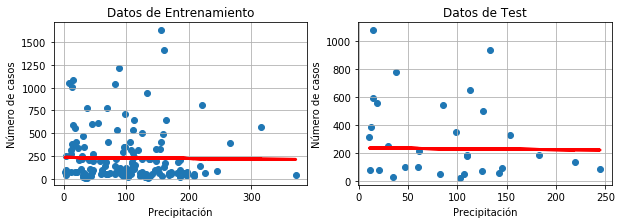

Precisión del modelo: R =  0.00018757301511418412



************************Humedad relativa media************************




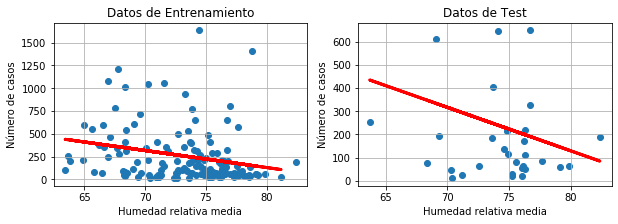

Precisión del modelo: R =  0.05770549718328044



***********************Humedad relativa máxima************************




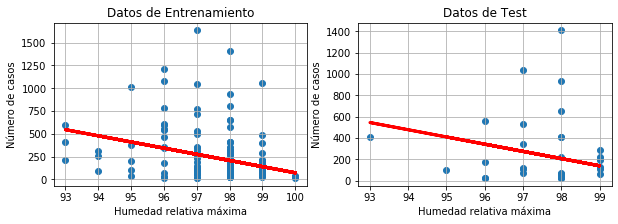

Precisión del modelo: R =  0.1180592514624228



***********************Humedad relativa mínima************************




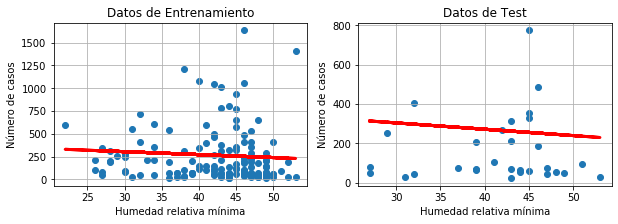

Precisión del modelo: R =  0.004629822086769209



**************************Temperatura media***************************




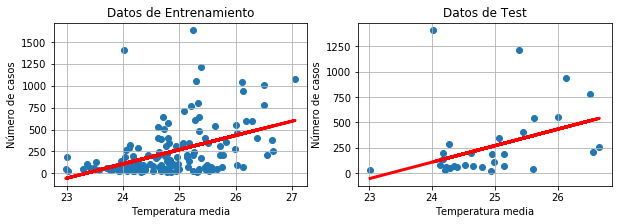

Precisión del modelo: R =  0.2322285963553039



**************************Temperatura máxima**************************




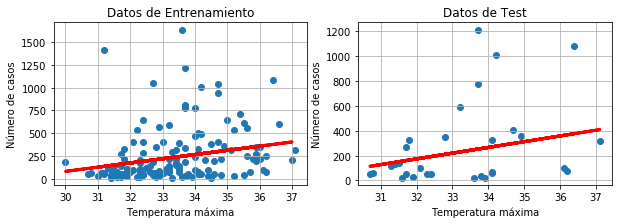

Precisión del modelo: R =  0.05579913118596258



**************************Temperatura mínima**************************




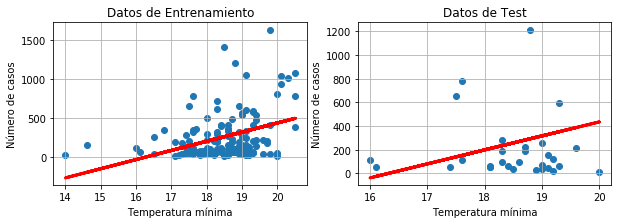

Precisión del modelo: R =  0.15931995400348042



*************************Temperatura niño 1+2*************************




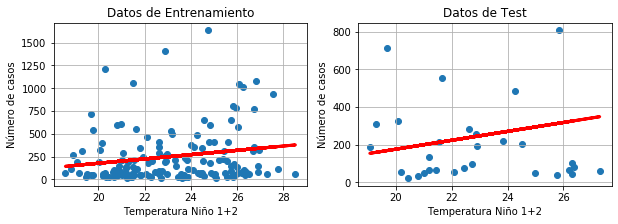

Precisión del modelo: R =  0.03192440802867813



**************************Anomalia niño 1+2***************************




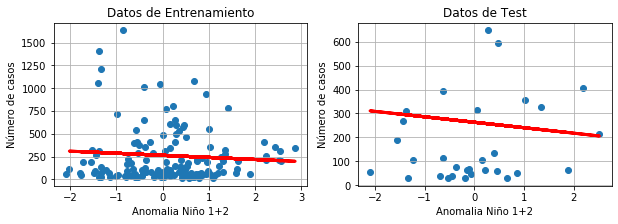

Precisión del modelo: R =  0.005355642628449786



**************************Temperatura niño 3**************************




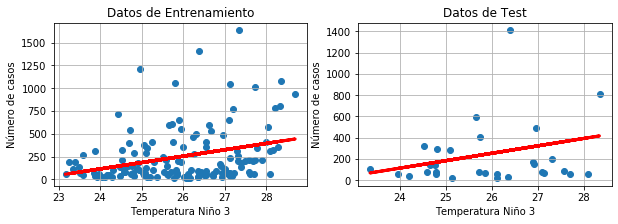

Precisión del modelo: R =  0.10082229729701597



***************************Anomalia niño 3****************************




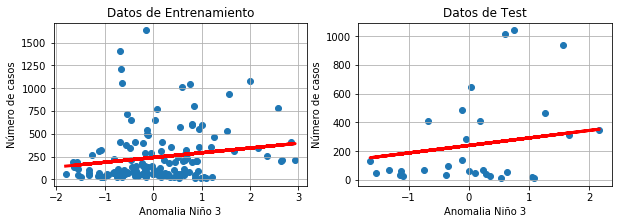

Precisión del modelo: R =  0.02895684944359178



**************************Temperatura niño 4**************************




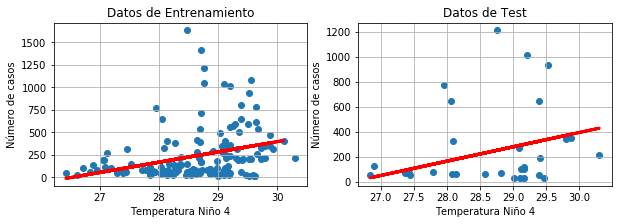

Precisión del modelo: R =  0.1020447548859289



***************************Anomalia  niño 4***************************




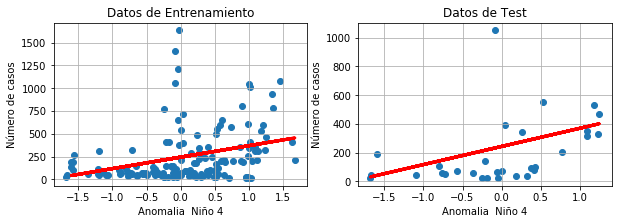

Precisión del modelo: R =  0.09482081304504841



*************************Temperatura niño 3+4*************************




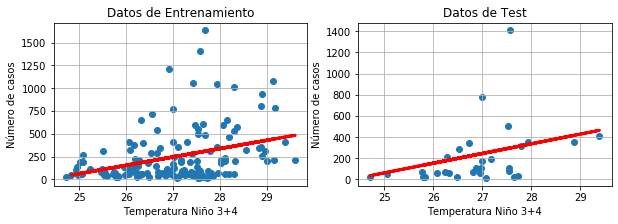

Precisión del modelo: R =  0.11633130030956929



**************************Anomalia niño 3+4***************************




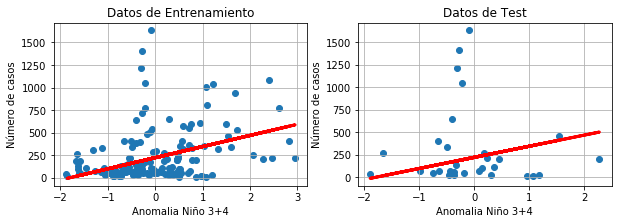

Precisión del modelo: R =  0.2517869810796943





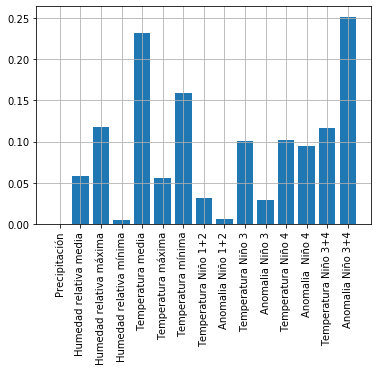

In [16]:
#Precision en la regresion lineal simple con datos desnormalizados

#Arreglo para almacenar la correlacion simple de cada variable desnormalizada
P_R_L_S_DN = np.zeros(15)


#Encabezado
cadena = ""
print (cadena.center(100, "="))
cadena = "                                      REGRESION LINEL SIMPLE                                      "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                               DATOS MENSUALES DESNORMALIZADOS - CALI                             "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    


#Seleccionar como variable dependiente el numero de casos confirmados
y = Datos_dn[:, len(Datos_dn[0])-2]

for i in range (2,len(Datos[0])-2):
    cadena = Nombres[i].capitalize() 
    print (cadena.center(70, "*")) 
    print ('\n')    

    
    # Capturar y estructurar las variables independientes del modelo
    X = Datos_dn[:, i]
    X = np.reshape(X, (L,1))
    


    #Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

    #Defino el algoritmo a utilizar
    lr = linear_model.LinearRegression()

    #Entreno el modelo
    lr.fit(X_train, y_train)

    #Realizo una predicción para datos de entrenamientos
    Y_pred = lr.predict(X_train)

    
    #Graficamos los datos correspondientes
    fig, axes = plt.subplots(1, 2, figsize=(10,3))
    
    # Grafico de datos de entrenamiento y prediccion con esos datos
    axes[0].scatter(X, y)
    axes[0].plot(X_train, Y_pred, color='red', linewidth=3)
    axes[0].grid(True)
    axes[0].set_title('Datos de Entrenamiento')
    axes[0].set_xlabel(Nombres[i])
    axes[0].set_ylabel('Número de casos')

    #Realizo una predicción para datos de test
    Y_pred = lr.predict(X_test)

    
    # Grafico de datos de test y prediccion con esos datos
    axes[1].scatter(X_test, y_test)
    axes[1].plot(X_test, Y_pred, color='red', linewidth=3)
    axes[1].grid(True)
    axes[1].set_title('Datos de Test')
    axes[1].set_xlabel(Nombres[i])
    axes[1].set_ylabel('Número de casos')
    plt.show()
    P_R_L_S_DN[i-2]=lr.score(X_train, y_train)
    print('Precisión del modelo: R = ',P_R_L_S_DN[i-2])
    print('\n\n')    

    
#Grafico de barras con la presición del modelo para cada variable
fig = plt.figure(u'precisión del modelo para cada variable')
ax = fig.add_subplot(111) # Axes

Variables = Nombres[2:-2]
datos = P_R_L_S_DN
xx = range(len(datos))

ax.bar(xx, datos, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(Variables,rotation=90)
ax.grid(True)
plt.show()




# Regresion lineal múltiple con datos normalizados

In [17]:
#Precision en la regresion lineal multiple con datos normalizados


#Encabezado
cadena = ""
print (cadena.center(100, "="))
cadena = "                                     REGRESION LINEL MULTIPLE                                     "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                                DATOS MENSUALES NORMALIZADOS - CALI                               "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    

# Capturar y estructurar las variables independientes del modelo
# Humedad relativa media
X = Datos[:, 3]
X = np.reshape(X, (L,1))
# Humedad relativa máxima
X1 = Datos[:, 4]
X1 = np.reshape(X1, (L,1))

X = np.append(X, X1, axis=1)

# Temperatura media
X1 = Datos[:, 6]
X1 = np.reshape(X1, (L,1))

X = np.append(X, X1, axis=1)

# Temperatura máxima
X1 = Datos[:, 7]
X1 = np.reshape(X1, (L,1))

X = np.append(X, X1, axis=1)

# 'ANOM.1','NINO4','ANOM.2','NINO3.4','ANOM.3
X1 = Datos[:, 12:17]
X1 = np.reshape(X1, (L,5))

X = np.append(X, X1, axis=1)

#Seleccionar como variable dependiente el numero de casos confirmados
y = Datos[:, len(Datos[0])-2]



#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

#Defino el algoritmo a utilizar
lr_multiple = linear_model.LinearRegression()

#Entreno el modelo
lr_multiple.fit(X_train, y_train)

#Realizo una predicción para datos de entrenamientos
Y_pred_multiple = lr_multiple.predict(X_test)


P_R_L_M_N = lr_multiple.score(X_train, y_train)
print('Precisión del modelo:')
print(P_R_L_M_N)

=                                     REGRESION LINEL MULTIPLE                                     =
=                                                                                                  =
=                                DATOS MENSUALES NORMALIZADOS - CALI                               =




Precisión del modelo:
0.32184128075816665


# Regresion lineal múltiple con datos desnormalizados

In [18]:
#Precision en la regresion lineal multiple con datos normalizados


#Encabezado
cadena = ""
print (cadena.center(100, "="))
cadena = "                                     REGRESION LINEL MULTIPLE                                     "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                               DATOS MENSUALES DESNORMALIZADOS - CALI                             "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    


# Capturar y estructurar las variables independientes del modelo
# Humedad relativa media
X = Datos_dn[:, 3]
X = np.reshape(X, (L,1))
# Humedad relativa máxima
X1 = Datos_dn[:, 4]
X1 = np.reshape(X1, (L,1))

X = np.append(X, X1, axis=1)

# Temperatura media
X1 = Datos_dn[:, 6]
X1 = np.reshape(X1, (L,1))

X = np.append(X, X1, axis=1)

# Temperatura máxima
X1 = Datos_dn[:, 7]
X1 = np.reshape(X1, (L,1))

X = np.append(X, X1, axis=1)

# 'ANOM.1','NINO4','ANOM.2','NINO3.4','ANOM.3
X1 = Datos_dn[:, 12:17]
X1 = np.reshape(X1, (L,5))

X = np.append(X, X1, axis=1)

#Seleccionar como variable dependiente el numero de casos confirmados
y = Datos_dn[:, len(Datos[0])-2]



#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

#Defino el algoritmo a utilizar
lr_multiple = linear_model.LinearRegression()

#Entreno el modelo
lr_multiple.fit(X_train, y_train)

#Realizo una predicción para datos de entrenamientos
Y_pred_multiple = lr_multiple.predict(X_test)


P_R_L_M_DN = lr_multiple.score(X_train, y_train)
print('Precisión del modelo:')
print(P_R_L_M_DN)

=                                     REGRESION LINEL MULTIPLE                                     =
=                                                                                                  =
=                               DATOS MENSUALES DESNORMALIZADOS - CALI                             =




Precisión del modelo:
0.37709335485155804
